In [142]:
#Importing libraries 
from scipy import stats
from scipy.stats import norm, skew 
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
import datatable as dt 
%matplotlib inline

In [143]:
df = pd.read_csv("data/cleaned_data.csv")

In [144]:
df.fillna(0)

,Unnamed: 0,Asset,State,Post Code,Address,Date,Time,Count Last Year,Count This Year,Count Var,...,Time of maximum wind gust,9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Count
0,0,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,00:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
1,1,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,01:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
2,2,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,02:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
3,3,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,03:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
4,4,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,04:00:00,12,9,-3,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104683,104683,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,19:00:00,194,286,92,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,194
104684,104684,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,20:00:00,145,257,112,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,145
104685,104685,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,21:00:00,71,94,23,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,71
104686,104686,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,22:00:00,43,33,-10,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,43


In [145]:
df['Direction of maximum wind gust '].value_counts()

ESE    23808
E       9096
SSW     8664
SW      7920
SE      7848
NNE     5568
WSW     5496
SSE     5424
S       5352
ENE     5280
NE      5136
N       4584
W       4032
WNW     2544
NNW     2040
NW      1896
Name: Direction of maximum wind gust , dtype: int64

In [146]:
df['Direction of maximum wind gust '] = df['Direction of maximum wind gust '].astype('category').cat.codes

In [147]:
df['Direction of maximum wind gust '].value_counts()

2     23808
0      9096
11     8664
12     7920
9      7848
5      5568
15     5496
10     5424
8      5352
1      5280
4      5136
3      4584
13     4032
14     2544
6      2040
7      1896
Name: Direction of maximum wind gust , dtype: int64

In [148]:
print(df['Count'].astype(float).describe())

count    104688.000000
mean        496.674003
std         677.327439
min           0.000000
25%           5.000000
50%         144.000000
75%         819.000000
max        5632.000000
Name: Count, dtype: float64


<AxesSubplot:xlabel='9am wind speed (km/h)', ylabel='Count'>

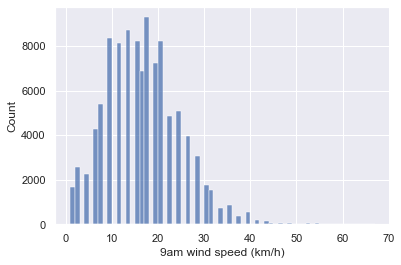

In [149]:
sns.histplot(data=df, x="9am wind speed (km/h)", binwidth=1, )

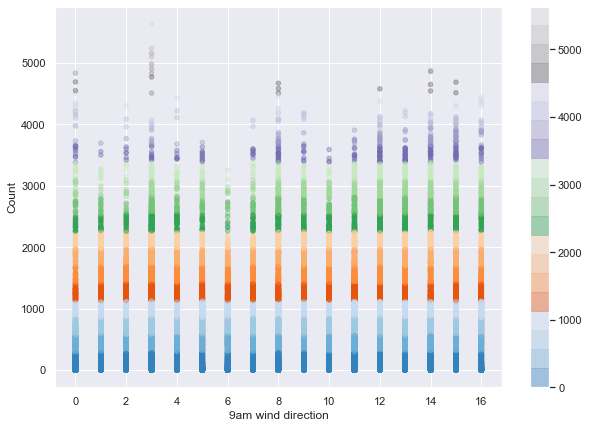

In [150]:
df.plot(kind="scatter", x="9am wind direction", y="Count", alpha=0.4, figsize=(10,7), c=df["Count"].astype(float), cmap="tab20c", colorbar=True, sharex=False);

Text(0.5, 0, 'Count')

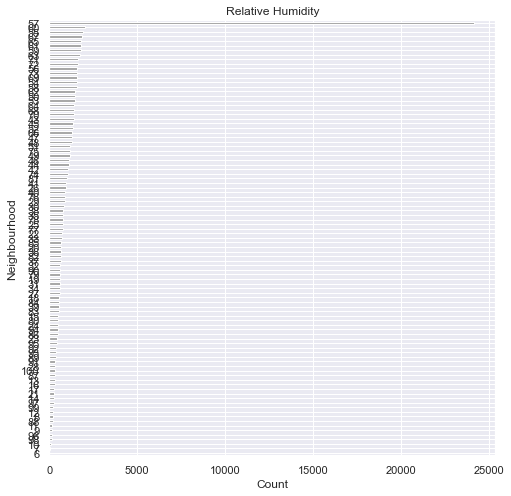

In [151]:
df['3pm relative humidity (%)'].value_counts().sort_values().plot(kind='barh', color='darkgrey', figsize=(8, 8))
plt.title('Relative Humidity')
plt.ylabel('Neighbourhood')
plt.xlabel('Count')

In [152]:
x1 = df[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)', 'Count']]


#sns.heatmap(x1)

In [153]:
memory_usage = df.memory_usage(deep=True) / 1024 ** 2
memory_usage.head(7)

Index          0.000122
Unnamed: 0     0.798706
Asset          6.626656
State          5.956970
Post Code      0.798706
Address       10.046104
Date           6.659706
dtype: float64

In [154]:
memory_usage.sum()

63.02898406982422

In [155]:
sample_df = df.sample(int(len(df) * 0.2))
sample_df.shape

(20937, 26)

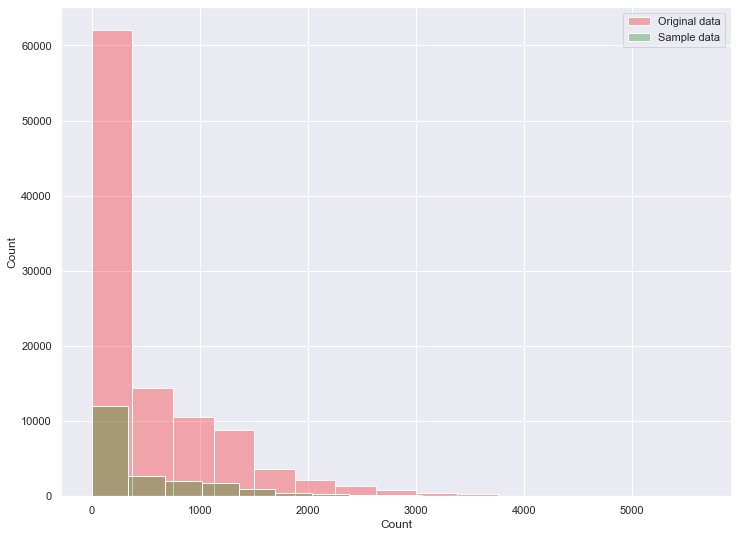

In [156]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=df, x="Count", label="Original data", color="red", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df, x="Count", label="Sample data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

<AxesSubplot:>

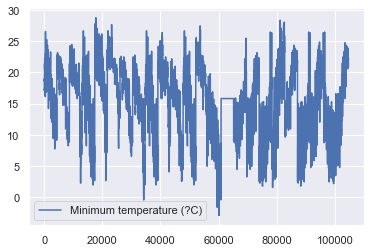

In [157]:
df[["Minimum temperature (?C)"]].plot()

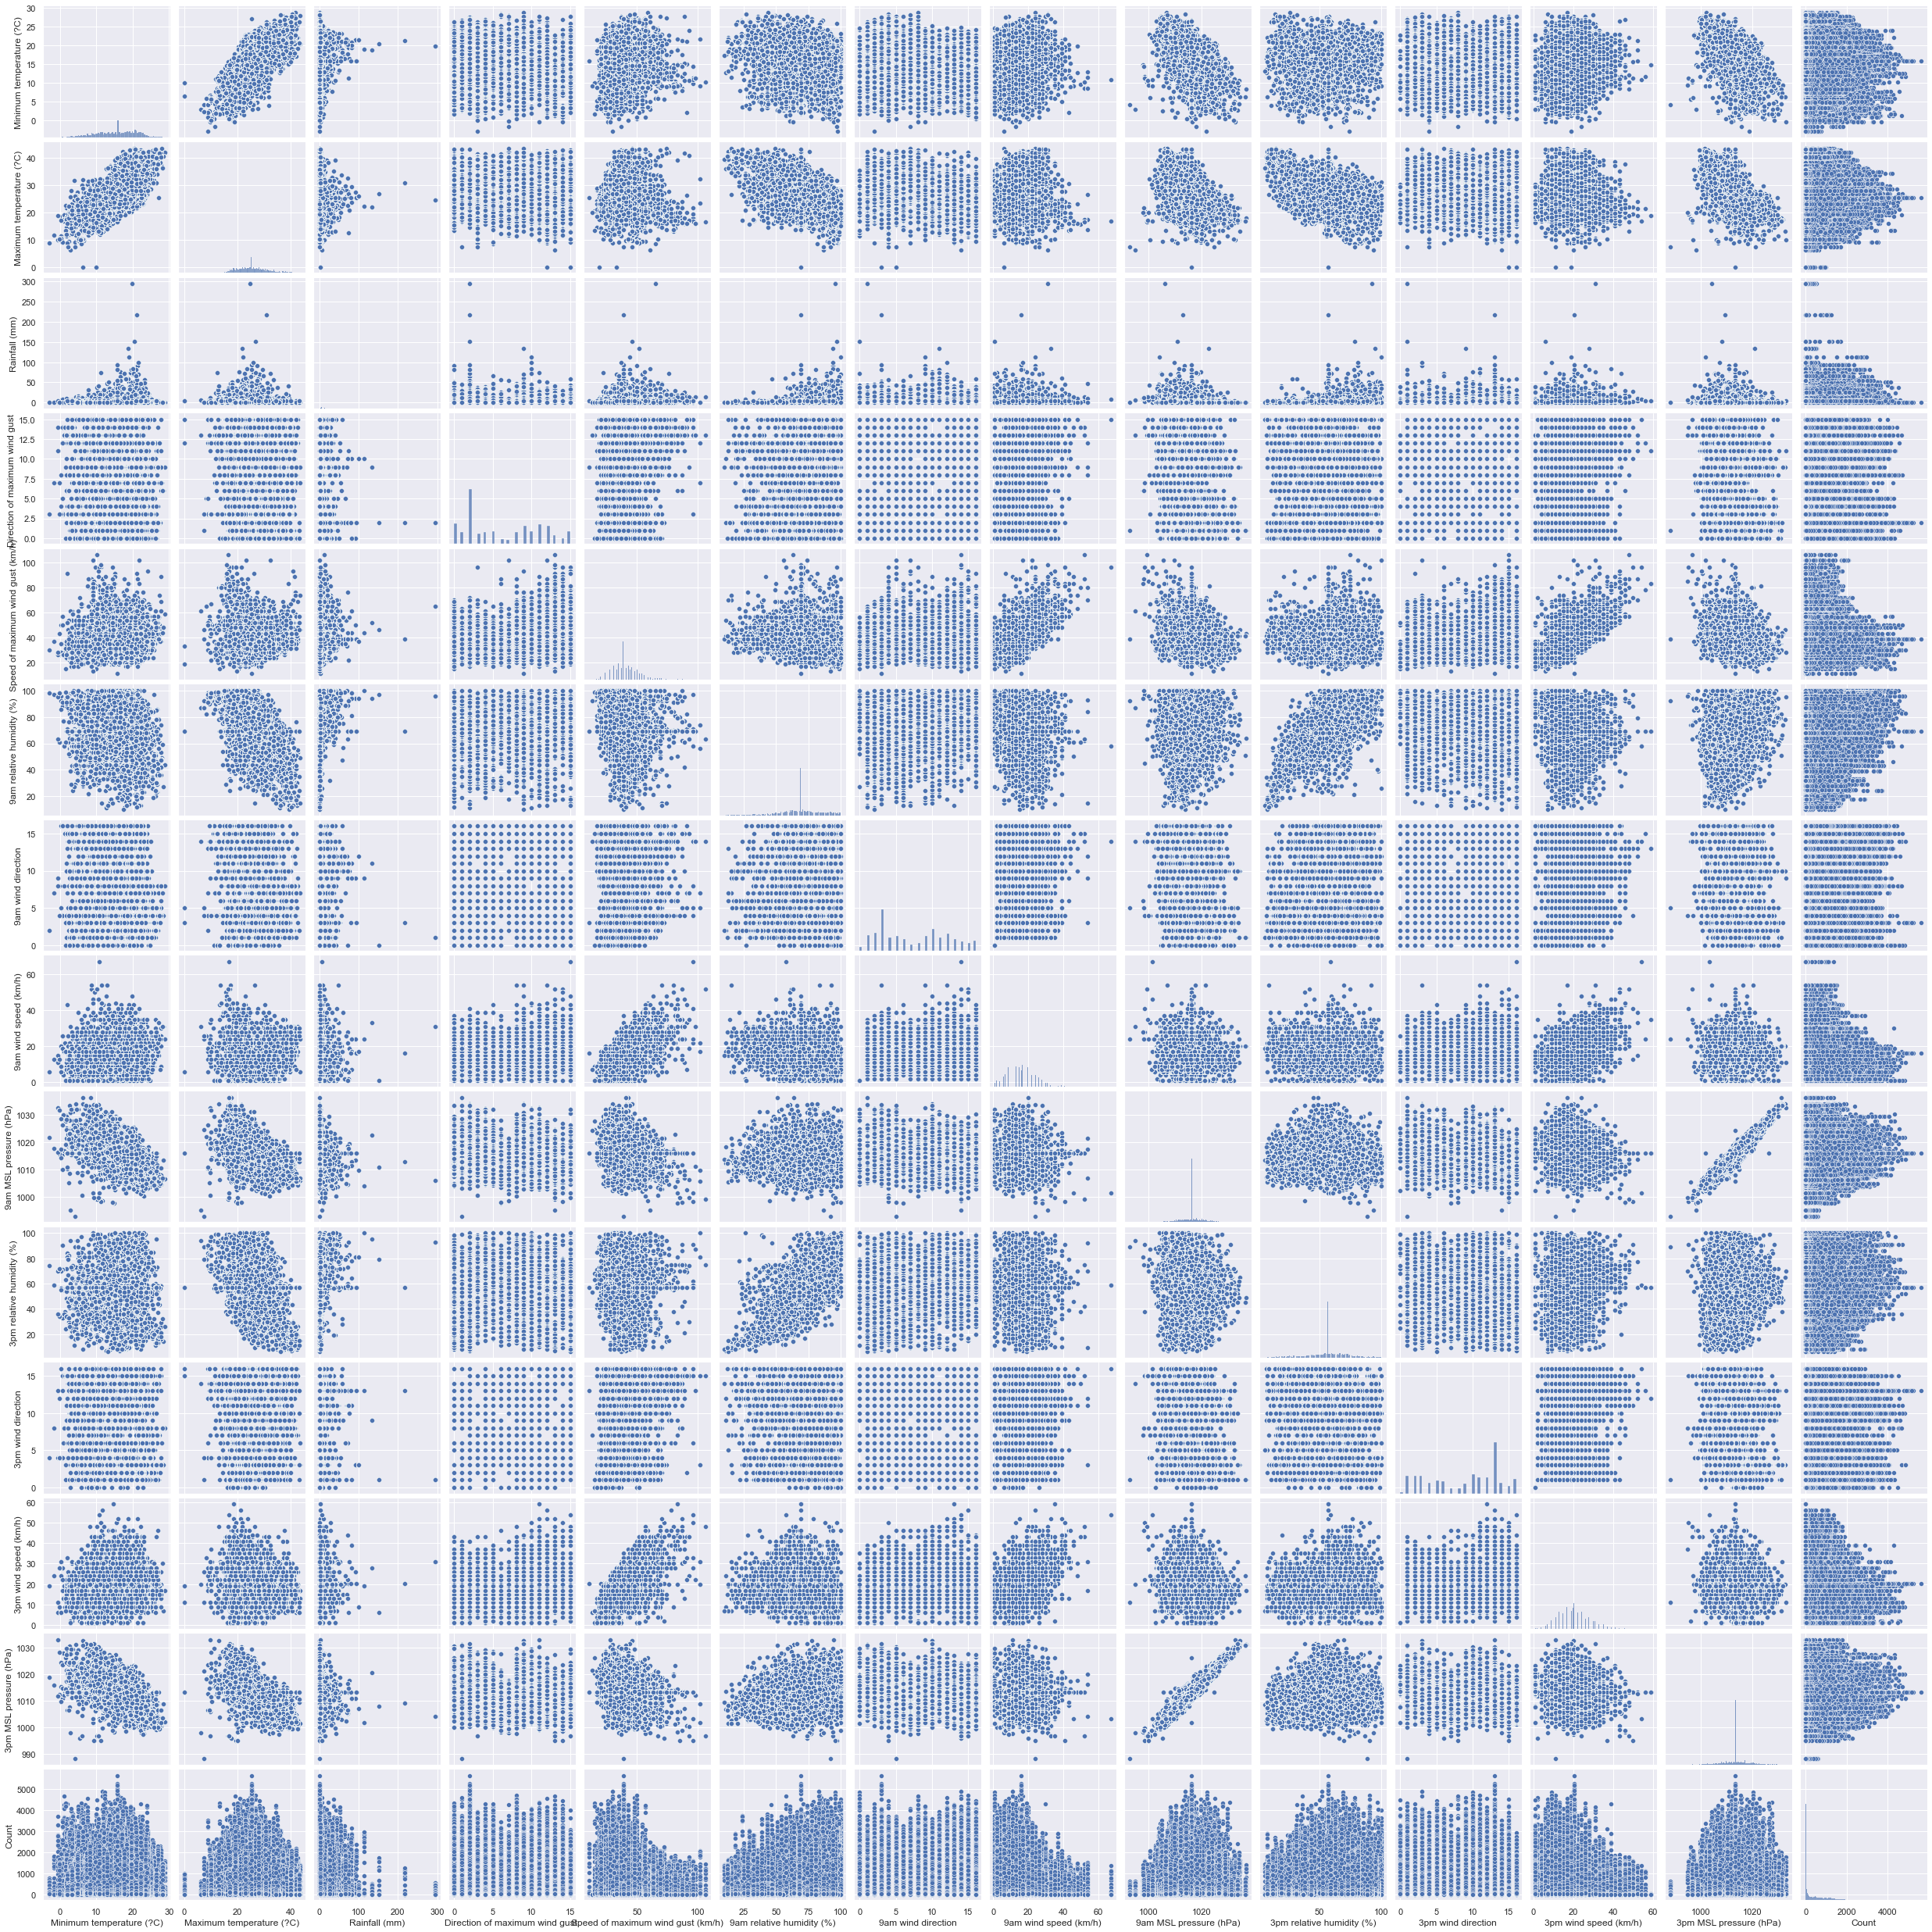

In [158]:
sns.pairplot(x1)

<AxesSubplot:>

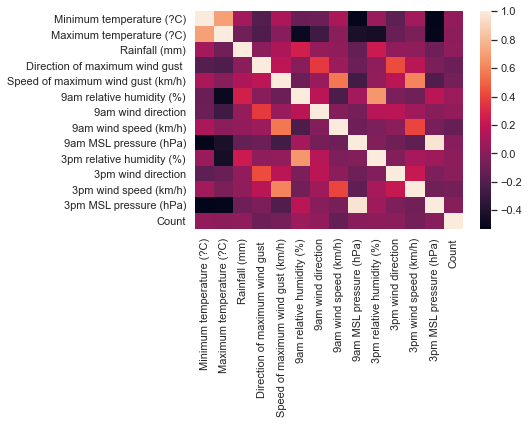

In [159]:
corr = x1.corr()

sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns)

In [189]:
Baldivis = df.loc[df['Post Code'] == 6171]

x1 = Baldivis[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Balgowlah = df.loc[df['Post Code'] == 2093]

x2 = Balgowlah[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Birtinya = df.loc[df['Post Code'] == 4575]

x3 = Birtinya[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Bull_Creek = df.loc[df['Post Code'] == 6149]

x4 = Bull_Creek[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Burleigh = df.loc[df['Post Code'] == 4220]

x5 = Burleigh[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Gladstone = df.loc[df['Post Code'] == 4680]

x6 = Gladstone[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Glendale = df.loc[df['Post Code'] == 2285]

x7 = Glendale[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Green_Hills = df.loc[df['Post Code'] == 2323]

x8 = Green_Hills[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Harrisdale = df.loc[df['Post Code'] == 6112]

x9 = Harrisdale[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Hervey_Bay = df.loc[df['Post Code'] == 4655]

x10 = Hervey_Bay[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Merrylands = df.loc[df['Post Code'] == 2160]

x11 = Merrylands[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Riverton = df.loc[df['Post Code'] == 6148]

x12 = Riverton[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Rockhampton = df.loc[df['Post Code'] == 4701]

x13 = Rockhampton[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Wendouree = df.loc[df['Post Code'] == 3355]

x14 = Wendouree[['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']]

Wetherill_Park = df.loc[df['Post Code'] == 2164]

x15 = Wetherill_Park[['Rainfall (mm)']]

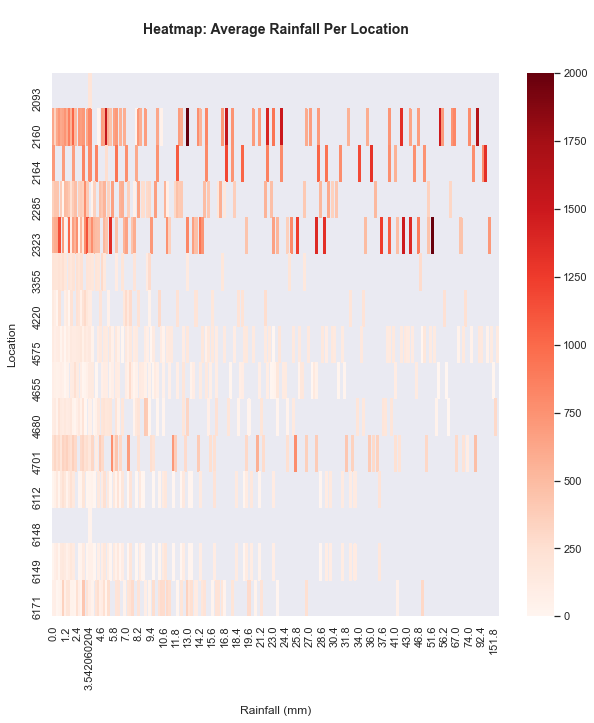

In [183]:
plt.figure(figsize=(10,10))
sns.heatmap(df.groupby(['Post Code', 'Rainfall (mm)']).Count.median().unstack(), cmap = 'Reds', annot=False, fmt=".0f")
                        
plt.xlabel('\nRainfall (mm)', fontsize=12)
plt.ylabel('Location\n', fontsize=12)
plt.title('\nHeatmap: Average Rainfall Per Location\n\n', fontsize=14, fontweight='bold');

In [163]:
sc = StandardScaler()
sc.fit(x1)

bb = sc.transform(x1)

In [190]:
# from sklearn.cluster import KMeans

# intertias = []

# for i in range (1, 11):
#     km = KMeans(n_clusters = i,
#                init = 'k-means++',
#                n_init = 10,
#                max_iter = 300,
#                random_state = 42)
#     km.fit(bb)
#     inertias.append(km.inertia_)
    
# plt.figure(figsize = (7,5))
# plt.title('No. of Clusters')
# plt.plot(range(1, 11), inertias, marker='o')

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from math import sqrt

X = x15
y = Wetherill_Park['Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3040, 1)
(3040,)
(1304, 1)
(1304,)


In [330]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [331]:
X_train_scaled.mean(axis = 0)

array([-3.62283303e-17])

In [332]:
X_train_scaled.std(axis = 0) 

array([1.])

In [333]:
models = {
        LinearRegression(): "Linear Regression",
        LogisticRegression(solver='lbfgs', max_iter=1000): "Logistic Regression",
        Lasso(): "Lasso",
        Ridge(): "Ridge",
        ElasticNet(): "ElasticNet",
        RandomForestRegressor(): "Random Forest",
        GradientBoostingRegressor(): "Gradient Booster"
}

for model in models.keys():
    model.fit(X_train_scaled, y_train)

In [334]:
for model, model_name in models.items():
    print(model_name + " accuracy score" + ": {:.3f}".format(model.score(X_train_scaled, y_train)))
    
for model, model_name in models.items():
    y_predict = model.predict(X_train_scaled)
    MSE = mean_squared_error(y_train, y_predict)
    print(f"Mean Squared Error of {model_name} = {MSE:.3f}")


Linear Regression accuracy score: 0.000
Logistic Regression accuracy score: 0.013
Lasso accuracy score: 0.000
Ridge accuracy score: 0.000
ElasticNet accuracy score: 0.000
Random Forest accuracy score: 0.007
Gradient Booster accuracy score: 0.006
Mean Squared Error of Linear Regression = 728402.585
Mean Squared Error of Logistic Regression = 1465836.908
Mean Squared Error of Lasso = 728403.585
Mean Squared Error of Ridge = 728402.585
Mean Squared Error of ElasticNet = 728415.589
Mean Squared Error of Random Forest = 723700.129
Mean Squared Error of Gradient Booster = 723795.505
